In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('funda-amsterdam.csv')
df.head(5)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


I want to use the price as the dependent variable, and the independent variables will be year_built, rooms and area. Putting this into a dataframe:

In [3]:
sdf = df[['area', 'rooms', 'year_built', 'price']]
#But I want to make sure that all houses with prices below 10.000 are not included.
sdf = sdf[sdf['price'] > 10000]
sdf

,area,rooms,year_built,price
0,108,3,1906,510000
1,47,2,1938,215000
2,116,3,2003,325000
3,58,3,1910,315000
4,63,3,1906,200000
5,125,3,1991,515000
6,64,4,1906,200000
7,155,5,1906,599000
8,85,3,2007,249000
9,67,3,1900,300000


In [5]:
y = sdf['price']
X = sdf.loc[:,'area':'year_built']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,area,rooms,year_built
3116,72,3,1986
9495,148,5,1906
9147,139,4,2016
2601,28,1,2014
10502,59,3,1991


In [6]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

#checking coefficients. 
coef = pd.DataFrame(X.columns.values, lm.coef_)
coef

,0
4251.295299,area
-16530.404794,rooms
-1141.852158,year_built


In [7]:
y_p = lm.predict(X_test)
r2_score(y_test, y_p)

0.6521403798622318

The R² is 0.65 which is pretty good

In [8]:
math.sqrt(mean_squared_error(y_test, y_p))

101573.38487700603

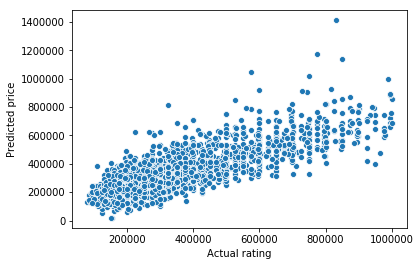

In [9]:
sns.scatterplot(y_test, y_p)
plt.xlabel('Actual rating')
plt.ylabel('Predicted price')
plt.show()